<a href="https://colab.research.google.com/github/Nyota-Lab/torch/blob/Reconocimiento-de-imagenes/Reconocimiento_de_imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Importamos torchvision porque vamos a trabajar con imagenes
  * utils para obtener la red neuronal
  * models para seleccionar el modelo
  * datasets para importar el dataset
  * transforms para realizar los cálculos con imagenes
* Además importamos una libreria que nos permita traer imágenes

In [0]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request

#Modelo pre-entrenado

---
* Existen muchos modelos pre-entrenados en Pytorch, en esta caso vamos a usar inception_v3



In [0]:
inception = models.inception_v3(pretrained=True)

* Una vez cargado nuestro modelo vamos a traer una imagen desde internet

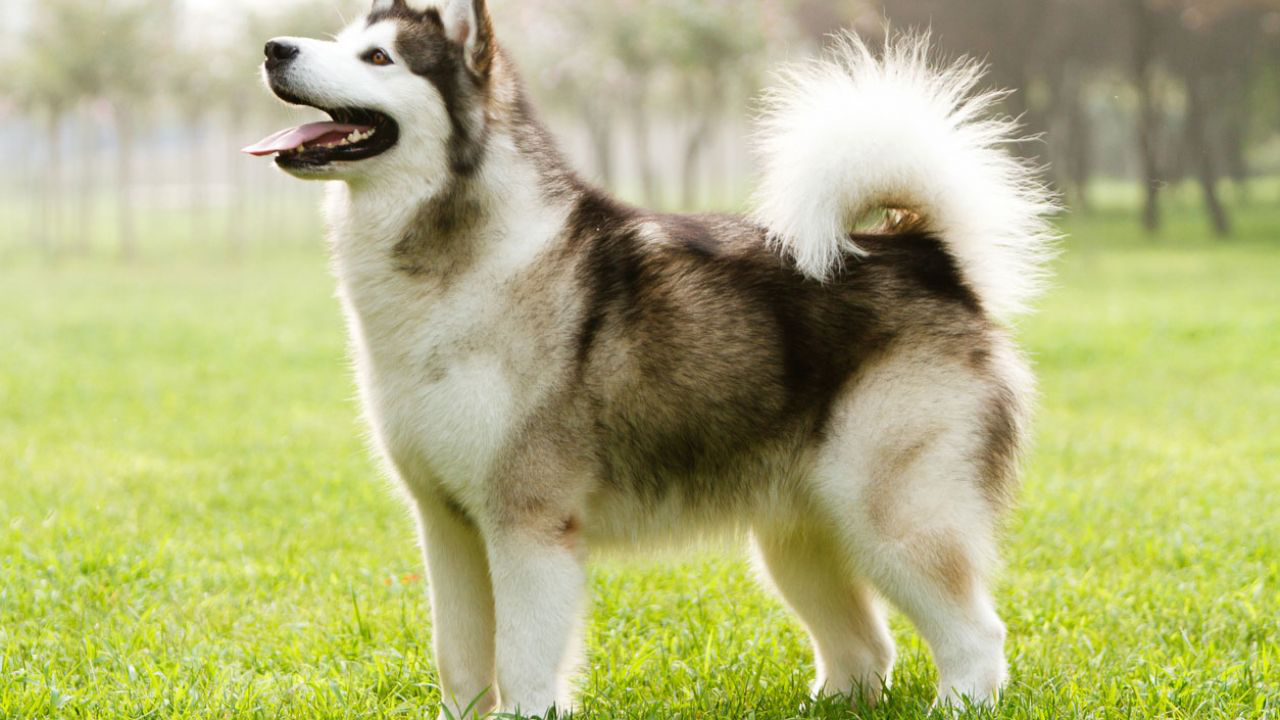

In [0]:
url = 'https://www.hogarmania.com/archivos/201809/alaskan-malamute-caracteristicas-ficha-1280x720x80xX.jpg'
image = request.urlretrieve(url, 'test.jpg')
img = Image.open(image[0])
img

* Ahora que tenemos nuestra imagen de prueba vamos a preprocesarla
* Vamos a realizar una serie de transformaciones a la misma:
 * Con Resize vamos a redimensionar la imagen
 * Con CenterCrop la centramos
 * Con ToTensor() vamos a transformar la imagen a números
 * Con Normalize vamos a normalizar cualquier imagen que entre en nuestro modelo

In [0]:
preprocess = transforms.Compose([
  transforms.Resize(128),
  transforms.CenterCrop(150),
  transforms.ToTensor(),
  transforms.Normalize(
      mean=[0.485,0.456,0.406],
      std=[0.229,0.224,0.225]
  )
])

* Una vez que ya tenemos nuestra funcion para hacer el preprocesamiento vamos a volver a instanciarla y le pasamos nuestra imagen de internet.
* Tenemos que generar una nueva dimension para que nuestro modelo pueda procesar el tensor
* Para tener una vista previa de nuestra imagen usamos plt pero debemos cambiar el orden de la dimension para tener el orden adecuado


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


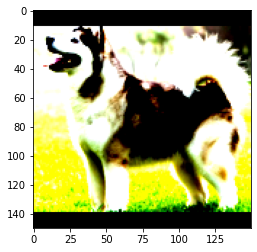

In [0]:
img_t = preprocess(img)
batch = torch.unsqueeze(img_t, 0)
plt.imshow(img_t.permute(1,2,0))

* Una vez tenemos nuestro dato de entrada vamos a evaluarlo con nuestro modelo

In [0]:
inception.eval()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [0]:
out = inception(batch)
out

tensor([[ 1.6157e+00, -1.5809e-01,  2.7125e+00,  3.2233e+00, -4.9515e+00,
         -2.3354e-01,  1.8704e+00, -2.5015e+00, -4.2341e+00,  1.7129e-01,
         -6.0589e+00, -6.7094e+00, -3.6729e+00, -2.1729e-01, -3.9464e+00,
         -4.8861e+00,  6.7580e-01,  2.5545e+00, -6.5411e-01, -2.3050e+00,
         -3.5827e+00, -4.3682e+00, -1.3256e+00,  7.0383e+00,  3.3267e-01,
         -1.8630e+00, -3.0603e+00, -9.5300e-01,  2.5714e-01,  8.3158e-02,
          6.3608e-01,  2.7684e+00, -8.5102e-02,  1.2221e+00, -1.6897e+00,
         -1.5175e+00,  1.0502e+00,  6.4868e-01, -3.5586e+00,  2.9416e+00,
         -1.2681e+00,  8.1230e-01,  1.0128e+00,  6.0434e-01,  2.1793e+00,
          1.1159e+00,  6.4781e-01,  2.2500e+00, -3.9351e-02, -2.8046e-01,
          2.5830e-01,  4.1238e+00, -1.8247e+00, -2.0548e+00,  2.7059e+00,
          1.5789e+00, -2.5659e+00,  2.6673e+00, -3.5620e+00, -1.4922e+00,
          3.5538e-02, -2.5546e+00, -2.5880e+00,  2.3899e-01,  1.2819e+00,
         -1.1302e-02, -2.9765e+00,  2.

In [0]:
request.urlretrieve('https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt', 'labels.txt')
with open('labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [0]:
out

tensor([[ 1.6157e+00, -1.5809e-01,  2.7125e+00,  3.2233e+00, -4.9515e+00,
         -2.3354e-01,  1.8704e+00, -2.5015e+00, -4.2341e+00,  1.7129e-01,
         -6.0589e+00, -6.7094e+00, -3.6729e+00, -2.1729e-01, -3.9464e+00,
         -4.8861e+00,  6.7580e-01,  2.5545e+00, -6.5411e-01, -2.3050e+00,
         -3.5827e+00, -4.3682e+00, -1.3256e+00,  7.0383e+00,  3.3267e-01,
         -1.8630e+00, -3.0603e+00, -9.5300e-01,  2.5714e-01,  8.3158e-02,
          6.3608e-01,  2.7684e+00, -8.5102e-02,  1.2221e+00, -1.6897e+00,
         -1.5175e+00,  1.0502e+00,  6.4868e-01, -3.5586e+00,  2.9416e+00,
         -1.2681e+00,  8.1230e-01,  1.0128e+00,  6.0434e-01,  2.1793e+00,
          1.1159e+00,  6.4781e-01,  2.2500e+00, -3.9351e-02, -2.8046e-01,
          2.5830e-01,  4.1238e+00, -1.8247e+00, -2.0548e+00,  2.7059e+00,
          1.5789e+00, -2.5659e+00,  2.6673e+00, -3.5620e+00, -1.4922e+00,
          3.5538e-02, -2.5546e+00, -2.5880e+00,  2.3899e-01,  1.2819e+00,
         -1.1302e-02, -2.9765e+00,  2.

In [0]:
_, index = torch.max(out, 1)

In [0]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('malamute, malemute, Alaskan malamute', 99.99996185302734)

#Trabajando un Dataset


---
* Para esta ocasion vamos a usar un dataset que se encuentra dentro de la libreria datasets de Pytorch


In [0]:
data_path = 'data/'
dataset = datasets.CIFAR10(data_path, train=True, download=True)
validation_set = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
len(dataset)

50000

In [0]:
img, label = dataset[100]
img, label, classes[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FC17611B668>, 8, 'ship')

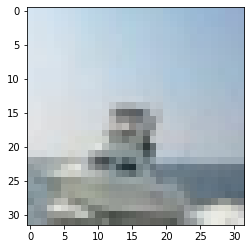

In [0]:
plt.imshow(img)

* Una vez tenemos nuestras imagenes vamos a transformarlas a tensor, para eso instanciamos la funcion y despues la aplicamos a una variable

In [0]:
tensor_transform = transforms.ToTensor()
img_tensor = tensor_transform(img)
img, img_tensor, img_tensor.shape

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FC17611B668>,
 tensor([[[0.8353, 0.8275, 0.8275,  ..., 0.5922, 0.5922, 0.5843],
          [0.8392, 0.8314, 0.8314,  ..., 0.5961, 0.5961, 0.5922],
          [0.8471, 0.8392, 0.8353,  ..., 0.6000, 0.6000, 0.5922],
          ...,
          [0.5686, 0.5333, 0.5608,  ..., 0.8471, 0.7686, 0.7176],
          [0.5451, 0.5059, 0.5059,  ..., 0.8902, 0.8745, 0.8196],
          [0.5373, 0.5608, 0.5333,  ..., 0.8196, 0.8510, 0.8941]],
 
         [[0.8980, 0.8902, 0.8902,  ..., 0.6824, 0.6824, 0.6745],
          [0.8980, 0.8902, 0.8902,  ..., 0.6863, 0.6863, 0.6824],
          [0.8980, 0.8902, 0.8902,  ..., 0.6902, 0.6902, 0.6824],
          ...,
          [0.6235, 0.5804, 0.5961,  ..., 0.8510, 0.7725, 0.7176],
          [0.6000, 0.5569, 0.5451,  ..., 0.8941, 0.8784, 0.8196],
          [0.5961, 0.6078, 0.5686,  ..., 0.8196, 0.8510, 0.8941]],
 
         [[0.9490, 0.9412, 0.9412,  ..., 0.8078, 0.8078, 0.8000],
          [0.9451, 0.9373, 0.9373,  ..., 0

* Pero la anterior transformacion solo afecta a una imagen, necesitamos que se aplique a todo el dataset por lo cual vamos a volver a traer el dataset completo pero esta vez transformado a tensor
* De esta manera cuando llamemos a una imagen vamos a tener el tensor de la misma

In [0]:
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [0]:
img, label = dataset[100]
img

tensor([[[0.8353, 0.8275, 0.8275,  ..., 0.5922, 0.5922, 0.5843],
         [0.8392, 0.8314, 0.8314,  ..., 0.5961, 0.5961, 0.5922],
         [0.8471, 0.8392, 0.8353,  ..., 0.6000, 0.6000, 0.5922],
         ...,
         [0.5686, 0.5333, 0.5608,  ..., 0.8471, 0.7686, 0.7176],
         [0.5451, 0.5059, 0.5059,  ..., 0.8902, 0.8745, 0.8196],
         [0.5373, 0.5608, 0.5333,  ..., 0.8196, 0.8510, 0.8941]],

        [[0.8980, 0.8902, 0.8902,  ..., 0.6824, 0.6824, 0.6745],
         [0.8980, 0.8902, 0.8902,  ..., 0.6863, 0.6863, 0.6824],
         [0.8980, 0.8902, 0.8902,  ..., 0.6902, 0.6902, 0.6824],
         ...,
         [0.6235, 0.5804, 0.5961,  ..., 0.8510, 0.7725, 0.7176],
         [0.6000, 0.5569, 0.5451,  ..., 0.8941, 0.8784, 0.8196],
         [0.5961, 0.6078, 0.5686,  ..., 0.8196, 0.8510, 0.8941]],

        [[0.9490, 0.9412, 0.9412,  ..., 0.8078, 0.8078, 0.8000],
         [0.9451, 0.9373, 0.9373,  ..., 0.8118, 0.8118, 0.8039],
         [0.9373, 0.9294, 0.9294,  ..., 0.8078, 0.8078, 0.

In [0]:
img.min(), img.max()

(tensor(0.1176), tensor(0.9490))

* A pesar de que se transformó a tensor la imagen sigue siendo la misma

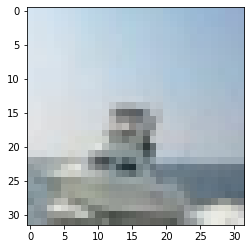

In [0]:
plt.imshow(img.permute(1,2,0))

* Vamos a genera un stack (agrupar muchos tensores) para poder trabajarlos, adicionalmente debemos asignarle la dimension que en este caso es 3 (alto, ancho y profundidad)

In [0]:
imgs = torch.stack([img_tensor for img_tensor, _ in dataset], dim=3)

In [0]:
imgs.shape

torch.Size([3, 32, 32, 50000])

* Ya que tenemos nuestro stack vamos a calcular la media y la desviacion estandar del dataset para poder **normalizarlo** como en el ejemplo de la imagen individual

In [0]:
imgs.view(3,-1).mean(dim=1)

tensor([0.4915, 0.4823, 0.4468])

In [0]:
imgs.view(3,-1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [0]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
      mean=[0.4915, 0.4823, 0.4468],
      std=[0.2470, 0.2435, 0.2616]
  )
])

* Ya que tenemos nuestra variable para normalizar el dataset vamos a volver a llamarlo pero esta vez no va a ser transformado a tensor, vamos a aplicar la normalizacion

In [0]:
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'frog'

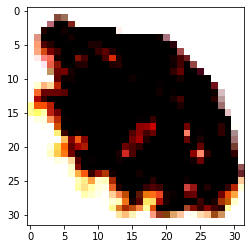

In [0]:
img_transformed,label = dataset[125]

plt.imshow(img_transformed.permute(1, 2, 0))
classes[label]